<a href="https://colab.research.google.com/github/FullStuckDevelooper/DataMiningSUck/blob/main/datakelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
df = pd.read_excel("datakelulusanmahasiswa.xls")

In [104]:
df.head(1000)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [105]:
df.drop(['NAMA'] , axis=1, inplace=True)

In [106]:
df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [108]:
jk_mapping_values = {"LAKI - LAKI": 1, "PEREMPUAN": 0 }
df.replace({"JENIS KELAMIN":jk_mapping_values}, inplace=True)

status_mapping_values = {"BEKERJA":1, "MAHASISWA": 0}
df.replace({"STATUS MAHASISWA":status_mapping_values}, inplace=True)


menikah_mapping_values = {"MENIKAH":1, "BELUM MENIKAH": 0}
df.replace({"STATUS NIKAH":menikah_mapping_values}, inplace=True)


kelulusan_mapping_values = {"TEPAT":1, "TERLAMBAT": 0}
df.replace({"STATUS KELULUSAN":kelulusan_mapping_values}, inplace=True)


In [109]:
df.loc[df['UMUR'] <= 25, 'UMUR'] = 0
df.loc[(df['UMUR'] > 25) & (df['UMUR'] <= 30), 'UMUR'] = 1
df.loc[df['UMUR'] > 30, 'UMUR'] = 2



In [119]:
df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,1,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0
1,0,0,2,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0
2,0,1,1,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0
3,0,0,1,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0
4,0,1,1,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0


In [111]:
x = df.drop("STATUS KELULUSAN", axis=1)

In [112]:
y = df["STATUS KELULUSAN"]

In [113]:
df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [114]:
tree_model = DecisionTreeClassifier()

tree_model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

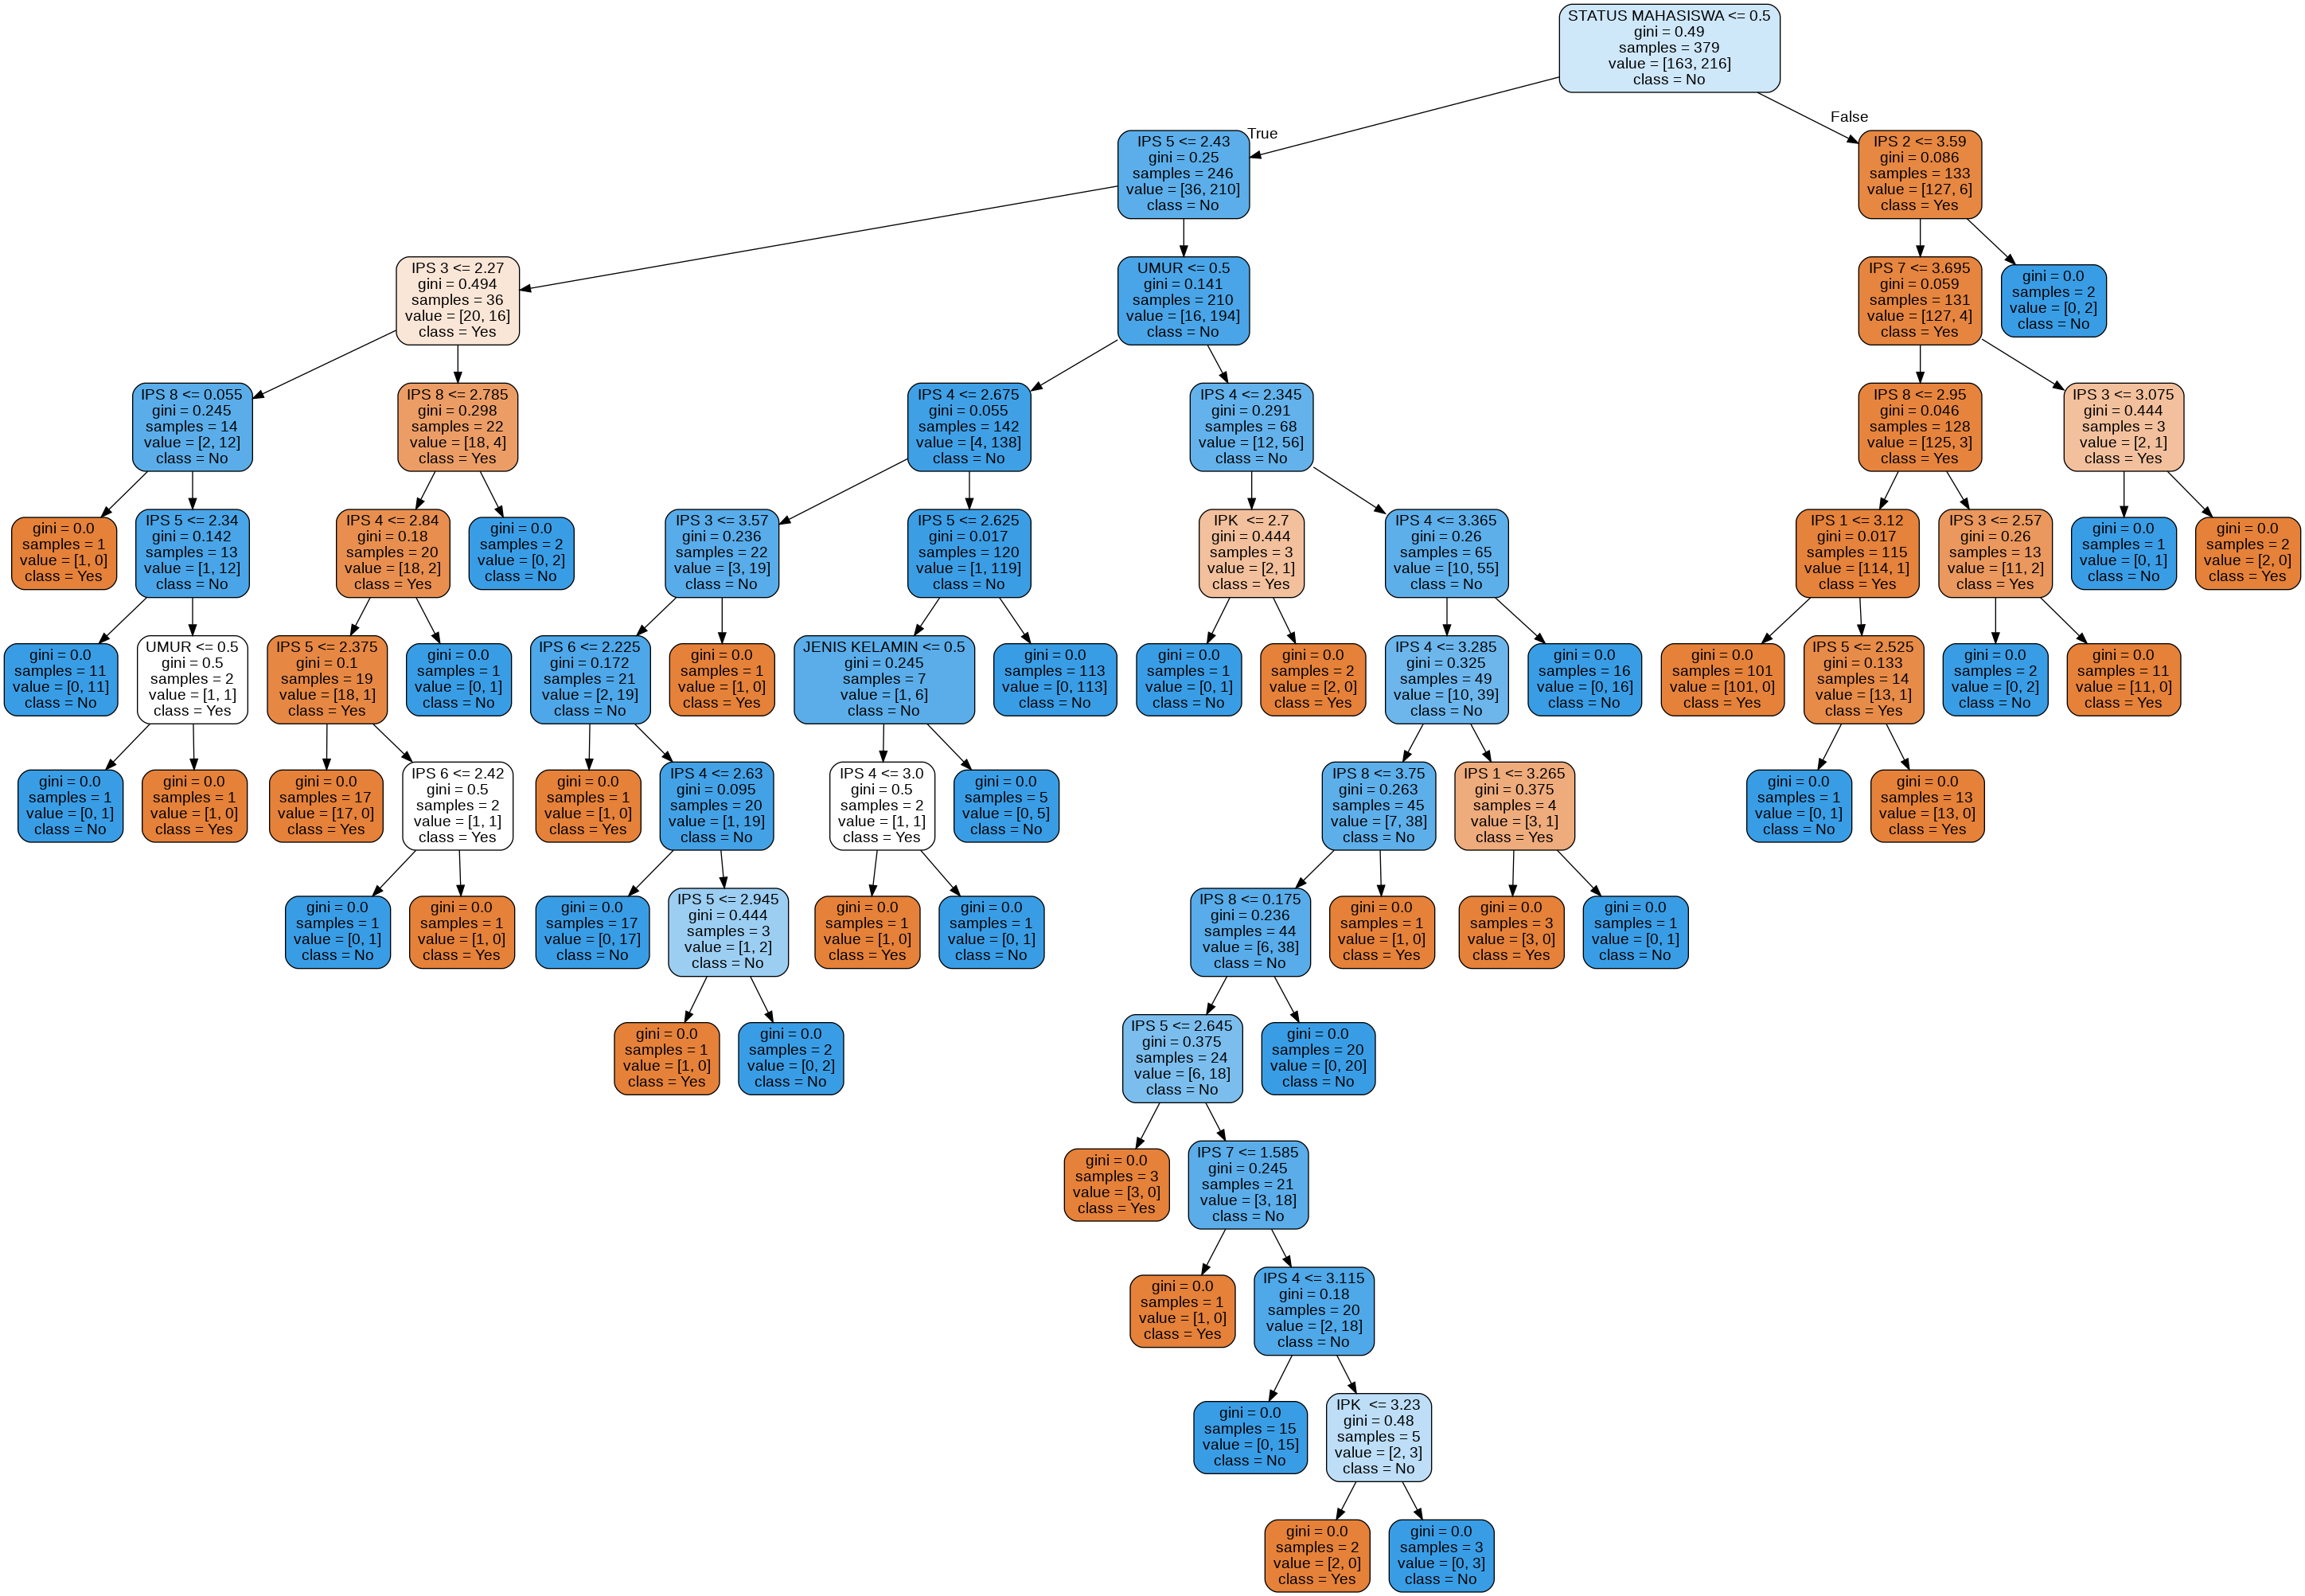

In [115]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(x.columns.values),
    class_names = ['Yes', 'No'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [120]:
tree_model.predict([[0,	1,	1,	0,	2.76,	2.80,	3.20,	3.17,	2.98,	3.00,	3.03,	0.0,	3.07],
                    [1,	0,	0,	0,	1.98,	2.50,	2.14,	2.77,	2.61,	2.93,	2.82,	2.5,	0.99],
                    [0,	0,	0,	0,	3.02,	2.94,	3.25,	2.87,	3.00,	2.94,	3.09,	3.0,	3.16],
                    [0,	1,	1,	0,	2.90,	2.89,	3.30,	2.85,	2.98,	3.00,	3.08,	0.0,	3.09]])


array([0, 1, 1, 0])